In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import tree
matplotlib.style.use('ggplot')
%matplotlib inline
from sklearn.model_selection import train_test_split # импорт библиотеки для сплита
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score 
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import GridSearchCV
from sklearn.dummy import DummyClassifier

# Описание бизнес-проблемы
Выявлено, что многие клиенты пользуются архивными тарифами у оператора мобильной связи «Мегалайн». Необходимо сформировать систему, способную проанализировать поведение клиентов и предложить пользователям новый тариф: «Смарт» или «Ультра».

# Задача 
Построить модель, которая выберет подходящий тариф с максимально большим значением *accuracy*, не менее 0.75.

# План
1. Провести анализ и чистку данных
2. Сформировать тренировучную, проверочную и тестовую выборки
3. Провести исследование моделей следующими методами:
- Дерево решений (DecisionTreeClassifier)
- Случайныйы лес (RandomForestClassifier)
- Логистическая регрессия (LogisticRegression)
4. Выбрать лучшую из моделей по критериям качества accuracy более 0.75
5. Проверить модель на тестовой выборке (эмитация продакшена)
6. Проверьте модель на адекватность

## Оценка  данных

In [3]:
data = pd.read_csv(r'C:\Users\Integro\Desktop\Обучение\YandexPracticum\Git Hub\users_behavior.csv')

In [4]:
data

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0
...,...,...,...,...,...
3209,122.0,910.98,20.0,35124.90,1
3210,25.0,190.36,0.0,3275.61,0
3211,97.0,634.44,70.0,13974.06,0
3212,64.0,462.32,90.0,31239.78,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


**Вывод:** Перепроверили пропуски. С данными все  хорошо, что-то дополнительно править не придеться. 

## Разбиение данных на выборки

Разделим исходные данные на обучающую, валидационную и тестовую выборки в соотношении (60/20/20)

In [6]:
data_train, data_valid_and_test = train_test_split(data, test_size=0.40, random_state=42) # Разобьём выборку на тренировочную и валидационную + тестовую
data_test, data_valid = train_test_split(data_valid_and_test, test_size=0.50, random_state=42)# Разобьём выборку на валидационную и тестовую

Проверим как распределились выборки

In [7]:
print(data_train.shape)
print(data_valid.shape)
print(data_test.shape)

(1928, 5)
(643, 5)
(643, 5)


## Исследование моделей
Проведем исследования следующими методами
- Дерево решений (DecisionTreeClassifier)
- Случайныйы лес (RandomForestClassifier)
- Логистическая регрессия (LogisticRegression) 

### Дерево решений

Разделим на выборки на информативные переменные и целевые

In [8]:
features_train = data_train.drop(['is_ultra'], axis=1)
target_train = data_train['is_ultra'] 
features_valid = data_valid.drop(['is_ultra'], axis=1)
target_valid = data_valid['is_ultra']
features_test = data_test.drop(['is_ultra'], axis=1)
target_test = data_test['is_ultra']

Проведем обучение классификатором дерево решений

In [9]:
model_DecisionTreeClassifier = DecisionTreeClassifier(random_state=42)
model_DecisionTreeClassifier.fit(features_train, target_train)

DecisionTreeClassifier(random_state=42)

Оценим точнность предсказаний проверочной выборке

In [10]:
valid_predictions = model_DecisionTreeClassifier.predict(features_valid)
print("Accuracy")
print("Доля правильных ответов на проверочной выборке:{:.2%}".format(accuracy_score(target_valid, valid_predictions)))

Accuracy
Доля правильных ответов на проверочной выборке:72.94%


**Вывод:** Точность ниже 0.75. Качесто предсказания не удовлетворяет требованиям заказчика.

#### Проведем изменение гиперпараметорв

Введем внешние ограничения изменим грубину веток дерева.(тут можно построить график)

In [11]:
best_model = None
best_result = 0
best_min_samples_leaf = None
best_min_samples_split = None
accuracy_tree = []
max_depth_tree =[]
result = 0


for depth in range(1, 30):
    accuracy_tree.append(result)
    max_depth_tree.append (depth)
    for samples_leaf in range(2, 5):
        for samples_split in range (2,6):
            model = DecisionTreeClassifier(random_state=42,max_depth=depth, min_samples_leaf=samples_leaf,min_samples_split=samples_split) # создадим модель с заданной глубиной дерева
            model.fit(features_train,target_train) # обучим модель
            predictions_valid = model.predict(features_valid) # получим предсказания модели
            result = accuracy_score(target_valid, predictions_valid)   # оценим качество модели

#             print('max_depth {}:min_samples_leaf {}: min_samples_split {}: accuracy {:.2%}'.format(depth,samples_leaf,samples_split,result))
            if result > best_result:
                best_model = model
                best_result = result
                best_depth = depth
                best_min_samples_leaf = samples_leaf
                best_min_samples_split = samples_split
                    
print()
print("Точность предсказаний лучшей модели: {:.2%}: Глубина дерева {}: Минимальное количество объектов в листе {}: Минимальное количество разделений {}» ".format(best_result,best_depth,best_min_samples_leaf,best_min_samples_split))


Точность предсказаний лучшей модели: 81.18%: Глубина дерева 4: Минимальное количество объектов в листе 2: Минимальное количество разделений 2» 


**Оценим ценность каждого признака**

In [12]:
pd.DataFrame({'feature':features_train.columns,
             'importance':model.feature_importances_}).sort_values('importance',ascending=False).style.format({'importance': '{:.2%}'.format})

,feature,importance
1,minutes,31.77%
3,mb_used,31.03%
2,messages,19.08%
0,calls,18.12%


C:\Users\Integro\AppData\Local\Temp/ipykernel_20868/3391441791.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:.1%}'.format(x) for x in ax.get_yticks()])


<function matplotlib.pyplot.show(close=None, block=None)>

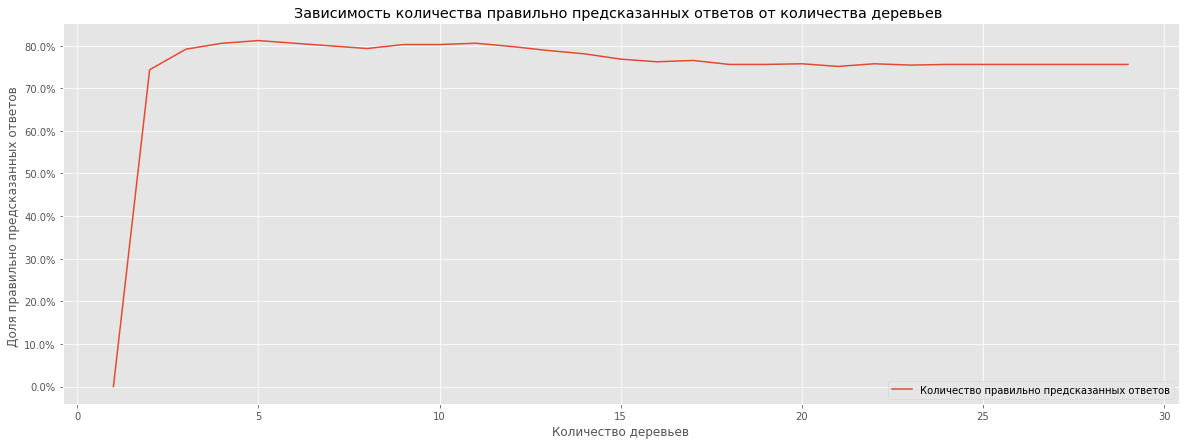

In [13]:
fig = plt.figure(figsize=(20, 7))
ax = fig.add_subplot()
plt.plot(max_depth_tree, accuracy_tree, label = 'Количество правильно предсказанных ответов')
plt.title ('Зависимость количества правильно предсказанных ответов от количества деревьев ')
plt.legend(loc = 'lower right')
plt.xlabel('Количество деревьев')
plt.ylabel('Доля правильно предсказанных ответов ')
ax.set_yticklabels(['{:.1%}'.format(x) for x in ax.get_yticks()])
plt.show

In [14]:
print("Точность предсказаний лучшей модели: {:.2%}: Глубина дерева {}: Минимальное количество объектов в листе {}: Минимальное количество разделений {}» ".format(best_result,best_depth,best_min_samples_leaf,best_min_samples_split))

Точность предсказаний лучшей модели: 81.18%: Глубина дерева 4: Минимальное количество объектов в листе 2: Минимальное количество разделений 2» 


**Вывод:** после глубины дерева 11 accuracy сильно падает. Оптимальная глубина 4-5.

In [15]:
cat_mat = metrics.confusion_matrix(target_valid,predictions_valid)
cat_mat = pd.DataFrame(cat_mat)
cat_mat

,0,1
0,378,70
1,87,108


#### Визуализируем дерево

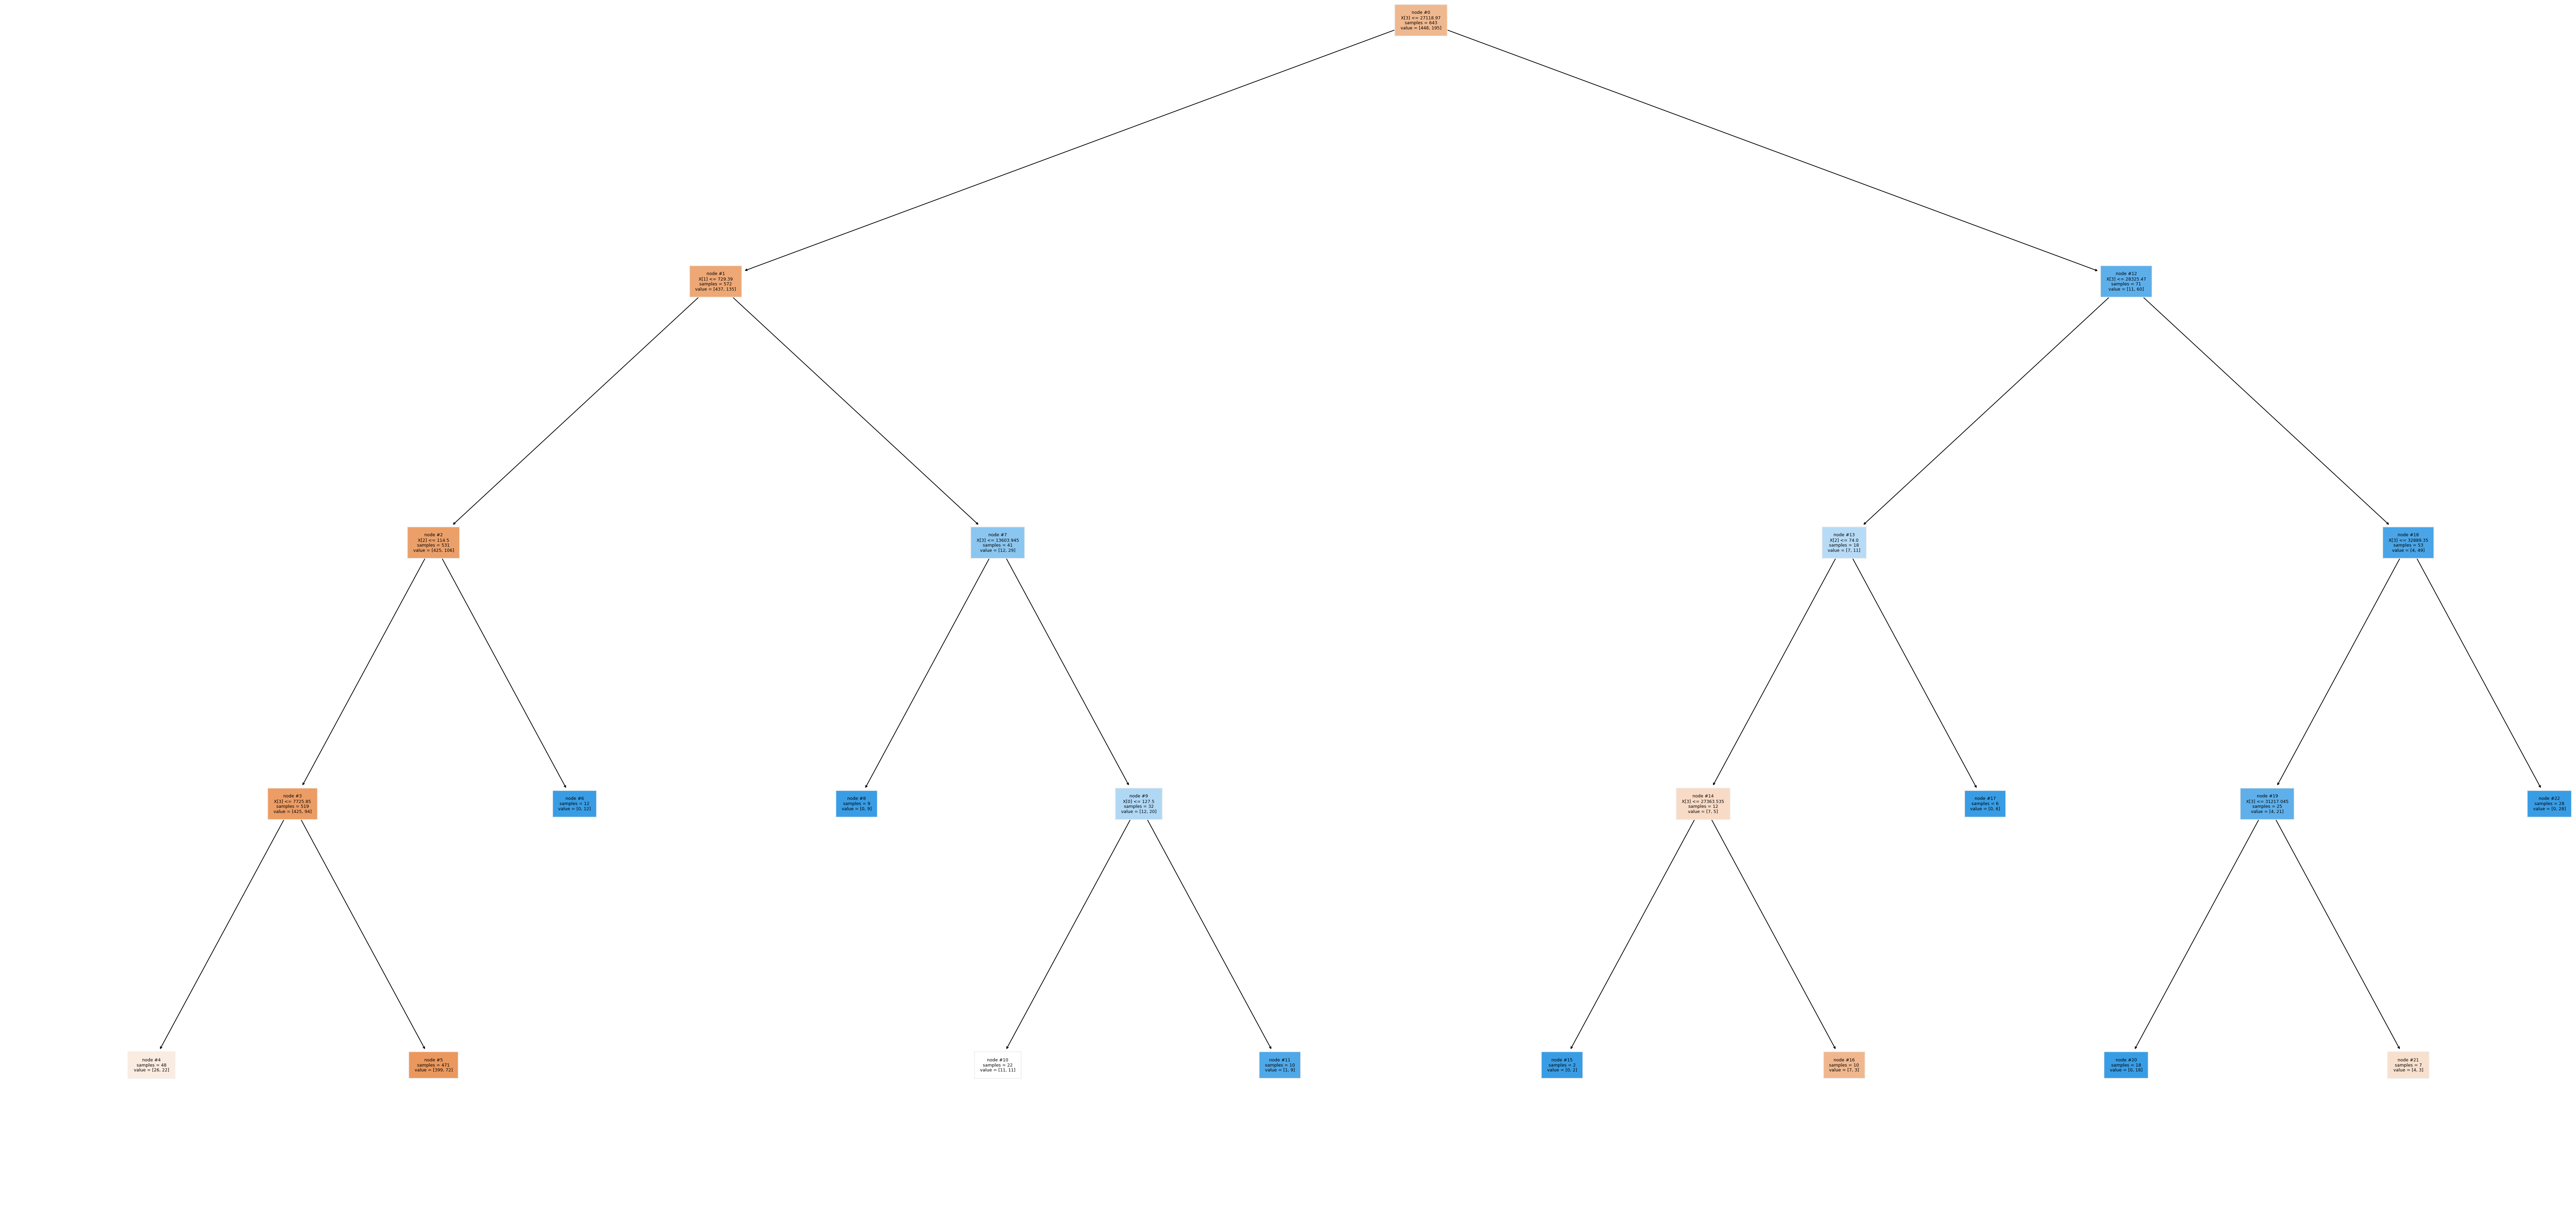

In [16]:
model_max_accuracy= DecisionTreeClassifier(random_state=42,max_depth=4, min_samples_leaf=2,min_samples_split=2).fit(features_valid,target_valid)
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (8,4), dpi = 300)
tree.plot_tree(model_max_accuracy,impurity =False, filled = True,node_ids =True,fontsize=3);

**Вывод:** Точность предсказаний лучшей модели: 81.18%: Глубина дерева 4: Минимальное количество объектов в листе 2: Минимальное количество разделений 2»Качесто классификации удовлетворяет требованиям заказчика.

### Случайный лес

In [17]:
accuracy = []
est_namber = []
best_model = None
best_result = 0


for est in range(1, 30):
    accuracy.append(result)
    est_namber.append(est)
    for depth in range (1, 10):
        for samples_leaf in range(2, 5):
            for samples_split in range (2,6):
                model = RandomForestClassifier(random_state=42, n_estimators=est, max_depth=depth,min_samples_leaf=samples_leaf,min_samples_split=samples_split) # обучим модель с заданным количеством деревьев n_estimators =30
                model.fit(features_train,target_train) # обучим модель на тренировочной выборке
                result = model.score(features_valid,target_valid) # посчитайте качество модели на валидационной выборке
                if result > best_result:
                    best_model = model # сохраним наилучшую модель
                    best_result = result #  сохраним наилучшее значение метрики accuracy на валидационных данных
                    best_depth = depth #  сохраним наилучшее значение метрики глубины дерева на валидационных данных
                    best_est = est #  сохраним наилучшее значение метрики количество деревьев на валидационных данных
                    best_min_samples_leaf = samples_leaf # сохраним наилучшее Минимальное количество объектов в листе
                    best_min_samples_split = samples_split # сохраним наилучшее Минимальное количество разделений
print()
print("Точность предсказаний лучшей модели: {:.2%}: Глубина дерева {}: Количество деревьев{}: Минимальное количество объектов в листе {}: Минимальное количество разделений {}» ".format(best_result,best_depth,best_est,best_min_samples_leaf,best_min_samples_split))


Точность предсказаний лучшей модели: 83.20%: Глубина дерева 8: Количество деревьев21: Минимальное количество объектов в листе 4: Минимальное количество разделений 2» 


C:\Users\Integro\AppData\Local\Temp/ipykernel_20868/3968806110.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:.1%}'.format(x) for x in ax.get_yticks()])


<function matplotlib.pyplot.show(close=None, block=None)>

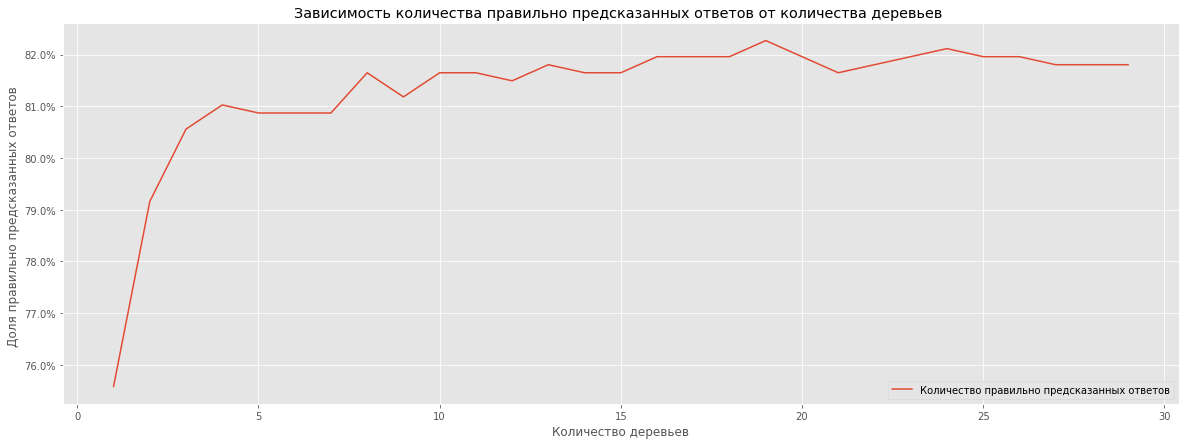

In [18]:
fig = plt.figure(figsize=(20, 7))
ax = fig.add_subplot()
plt.plot(est_namber,accuracy, label = 'Количество правильно предсказанных ответов')
plt.title ('Зависимость количества правильно предсказанных ответов от количества деревьев ')
plt.legend(loc = 'lower right')
plt.xlabel('Количество деревьев')
plt.ylabel('Доля правильно предсказанных ответов ')
ax.set_yticklabels(['{:.1%}'.format(x) for x in ax.get_yticks()])
plt.show

**Вывод:** Точность предсказаний лучшей модели: 83.20%: Глубина дерева 8: Количество деревьев21: Минимальное количество объектов в листе 4: Минимальное количество разделений 2» .

In [24]:
parametrs = {'n_estimators': range (10, 51, 10), 
               'max_depth': range (1,13, 2),
              'min_samples_leaf': range (1,8),
              'min_samples_split': range (2,10,2) }

In [25]:
clf = RandomForestClassifier(random_state= 42)
grid = GridSearchCV(clf, parametrs, cv=4,n_jobs=-1)
grid.fit(features_train, target_train)

GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(1, 13, 2),
                         'min_samples_leaf': range(1, 8),
                         'min_samples_split': range(2, 10, 2),
                         'n_estimators': range(10, 51, 10)})

In [26]:
grid.best_params_

{'max_depth': 9,
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 50}

In [27]:
model = RandomForestClassifier(random_state=42, n_estimators=50, max_depth=9,min_samples_leaf=2,min_samples_split=2,n_jobs=-1) # обучим модель с заданным количеством деревьев подобранными параметрами
# model.fit(features_train,target_train) # обучим модель на тренировочной выборке
model.fit(pd.concat([features_train,features_valid]),pd.concat([target_train,target_valid]))
predictions_test = model.predict(features_test) # получим предсказания модели
result = accuracy_score(target_test, predictions_test)
                
print("Точность предсказаний по лучшим гиперпараметрам модели на тестовой выборке: {:.2%}:".format(result))

Точность предсказаний по лучшим гиперпараметрам модели на тестовой выборке: 80.56%:


### Логистическая регрессия

In [28]:
model = LogisticRegression(random_state=42, solver = 'liblinear',penalty = 'l2', tol = 1e-4,multi_class='ovr',n_jobs=-1)  # инициализируем модель логистической регрессии
model.fit(features_train,target_train) # обучим модель на тренировочной выборке
preds= model.predict(features_valid)
result = model.score(features_valid,target_valid) # получим метрику качества модели на валидационной выборке

print("Accuracy модели логистической регрессии на валидационной выборке: {:.2%}".format(result))

Accuracy модели логистической регрессии на валидационной выборке: 70.92%


c:\users\integro\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:1523: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn(


In [29]:
from sklearn import metrics
cat_mat = metrics.confusion_matrix(target_valid,preds)

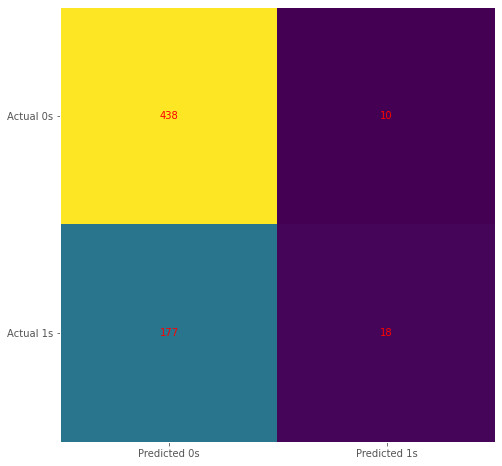

In [30]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cat_mat)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cat_mat[i, j], ha='center', va='center', color='red')
plt.show()

**Вывод** Все как- то плохо, количество ложно предсказаных нулей, как единцы - много

In [31]:
pred_prob = model.predict_proba(features_valid) #матрица вероятностей того, что прогнозируемый результат равен нулю или единице

In [32]:
preds = pred_prob[:,1]
fpr,tpr,threshold = metrics.roc_curve(target_valid,preds)
roc_auc = metrics.auc(fpr,tpr)

<function matplotlib.pyplot.show(close=None, block=None)>

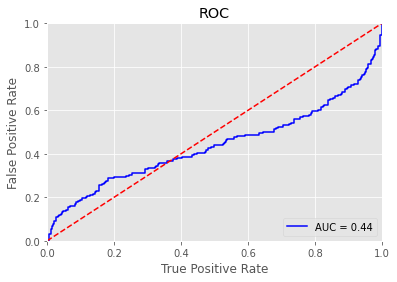

In [33]:
plt.plot(fpr,tpr,'b',label = 'AUC = %0.2f' % roc_auc)
plt.title ('ROC')
plt.legend(loc = 'lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('True Positive Rate')
plt.ylabel('False Positive Rate')
plt.show

## Проверьте модель на тестовой выборке

Воззьмем дерево с лучшими параметрами

In [35]:
%time
model = DecisionTreeClassifier(random_state=42,max_depth=4, min_samples_leaf=2,min_samples_split=2) # создадим модель с заданной глубиной дерева
model.fit(pd.concat([features_train,features_valid]),pd.concat([target_train,target_valid])) # обучим модель по выбраннм лучшим гиперпараметрам
# model.fit(features_train,target_train) 
predictions_test = model.predict(features_test) # получим предсказания модели
result = accuracy_score(target_test, predictions_test)   # оценим качество модели

print("Точность предсказаний по лучшим гиперпараметрам модели на тестовой выборке: {:.2%}:".format(result))# Глубина дерева {}: Минимальное количество объектов в листе {}: Минимальное количество разделений {}» ".format(best_result,best_depth,best_min_samples_leaf,best_min_samples_split))

Wall time: 0 ns
Точность предсказаний по лучшим гиперпараметрам модели на тестовой выборке: 77.76%:


In [36]:
%time
model = RandomForestClassifier(random_state=42, n_estimators=21, max_depth=8,min_samples_leaf=4,min_samples_split=2,n_jobs=-1) # обучим модель с заданным количеством деревьев n_estimators =30
# model.fit(features_train,target_train) # обучим модель на тренировочной выборке
model.fit(pd.concat([features_train,features_valid]),pd.concat([target_train,target_valid]))
predictions_test = model.predict(features_test) # получим предсказания модели
result = accuracy_score(target_test, predictions_test)
                
print("Точность предсказаний по лучшим гиперпараметрам модели на тестовой выборке: {:.2%}:".format(result))

Wall time: 0 ns
Точность предсказаний по лучшим гиперпараметрам модели на тестовой выборке: 81.18%:


**Вывод:** На тестовых выборках процент правильных предсказаний , чуть ниже чем на проверочной выборке. Но все же удовлетворяет требованием задачи, Accuracy

## Проверим модели на адекватность

Чтобы оценить адекватность модели в задачах классификации, можно сравнить её с константной или случайной. 
Определим  самый  частотный  класс и создадим вектор предсказаний константной модели. Определим какаая модель лучше.

In [37]:
model_preds_test = RandomForestClassifier(random_state=42,n_jobs=-1, n_estimators=21, max_depth=8,min_samples_leaf=4,min_samples_split=2).fit(features_train,target_train).predict(features_test)
dd = target_train.value_counts()

const_preds_test = pd.Series(0, index=target_valid.index)

model_test_accuracy = accuracy_score(model_preds_test, target_test)
const_test_accuracy = accuracy_score(const_preds_test, target_valid)
if model_test_accuracy > const_test_accuracy:
    print ("win")
else:
    print ("lose")    
print(model_test_accuracy)
print(const_test_accuracy)
print(dd)

win
0.7993779160186625
0.6967340590979783
0    1335
1     593
Name: is_ultra, dtype: int64


**Вывод:** метод случайный лес на на тестовой выборке  показывает более высокий результат, чем константное предсказание.

In [38]:

dummy = DummyClassifier(strategy='most_frequent').fit(pd.concat([features_train,features_valid]),pd.concat([target_train,target_valid]))
dummy_pred = dummy.predict(target_test)


print('Unique predicted labels: ', (np.unique(dummy_pred)))

print('Test score: ', accuracy_score(target_test, dummy_pred))

Unique predicted labels:  [0]
Test score:  0.6936236391912908


# Общий вывод:
В исследовании использовали три метода бинарной  классификации. 
- дерево решений на тестовой выборке  показывает  78.23% долю правильных ответов, скорость работы высокая. 
- случайный лес на тестовой выборке  показывает 79.94% долю правильных ответов, скорость работы очень низкая. 
- логистическая регрессия показывает на валидационной выборке: 70.92%, что неудовлетворяет условию требований задачи.<br><br>
Наиболее оптимально использовать метод дерево решений  с определенными гиперпараметрами, так как скорость и точность удовлетворяет требованием поставленной задачи по определению правильных ответов.
